<a href="https://colab.research.google.com/github/Diego15s/Diego15s-DIO-Baires-05-ReconhecimentoFacial/blob/main/Facial_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vasukipatel/face-recognition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1


In [17]:
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Akshay Kumar'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Camila Cabello'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Hrithik Roshan'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Priyanka Chopra'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Charlize Theron'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Hugh Jackman'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Alia Bhatt'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Claire Holt'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Jessica Alba'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Roger Federer'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Amitabh Bachchan'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Courtney Cox'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/Kashyap/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Vijay Deverakonda'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Andy Samberg'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Lisa Kudrow'/'Virat Kohli'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Anushka Sharma'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Margot Robbie'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Billie Eilish'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Ellen Degeneres'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/Marmik/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Brad Pitt'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Henry Cavill'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Natalie Portman'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Lisa Kudrow'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Virat Kohli'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Dwayne Johnson'/
!rm -r /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/'Tom Cruise'/

rm: cannot remove '/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original Images/Akshay Kumar/': No such file or directory
rm: cannot remove '/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original Images/Camila Cabello/': No such file or directory
rm: cannot remove '/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original Images/Hrithik Roshan/': No such file or directory
rm: cannot remove '/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original Images/Priyanka Chopra/': No such file or directory
rm: cannot remove '/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original Images/Charlize Theron/': No such file or directory
rm: cannot remove '/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original I

In [18]:
cd /root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/'Original Images'/'Original Images'/

/root/.cache/kagglehub/datasets/vasukipatel/face-recognition-dataset/versions/1/Original Images/Original Images


In [19]:
ls

'Alexandra Daddario'/  'Elizabeth Olsen'/  'Robert Downey Jr'/  'Zac Efron'/


In [20]:
# Carregar o modelo VGG16 pré-treinado, sem as camadas de classificação (topo)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

# Congelar as camadas convolucionais para que elas não sejam treinadas
base_model.trainable = False

In [21]:
# Adicionar camadas de classificação
x = base_model.output
x = Flatten()(x)  # Achatamento da saída da base_model
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

In [22]:
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    #Dropout(0.5),  # Evita overfitting
    Dense(4, activation='softmax')
])


In [23]:
# Função para carregar imagens e labels
def load_images_from_directory(directory, image_size=(500, 500)):
    images = []
    labels = []
    # Update the label_map to include all expected folder names.
    label_map = {'Elizabeth Olsen': 0, 'Robert Downey Jr': 1, 'Alexandra Daddario': 2, 'Zac Efron': 3}  # Mapeamento de labels

    # Loop sobre as subpastas, que devem ser nomeadas com o nome da pessoa
    for label_name in os.listdir(directory):
        label_folder = os.path.join(directory, label_name)
        if os.path.isdir(label_folder):
            for image_name in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_name)
                if image_path.endswith(('jpg', 'jpeg', 'png')):  # Considerar apenas imagens
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, image_size)  # Redimensiona para (100, 100)
                    images.append(image)
                    labels.append(label_map[label_name])  # Atribui o label correspondente

    return np.array(images), np.array(labels)

In [24]:
# Carregar imagens de treino e teste
X_train, y_train = load_images_from_directory(path + '/Original Images/Original Images')
X_test, y_test = load_images_from_directory(path + '/Original Images/Original Images')

In [25]:
# Normalizar as imagens para o intervalo [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transformar as labels em one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [26]:
# Aumentação de Dados (Data Augmentation) para gerar mais imagens de treino
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.03,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [27]:
# Callback para EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model before fitting. This is where 'loss' should be specified.
# Assuming 'model' is a Keras model:
from tensorflow.keras.optimizers import Adam # Importing Adam optimizer
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Agora você pode usar datagen para treinar o modelo
# Create the data generator flow

# Removed reshaping because y_train and y_test are already in the correct shape
# y_train_reshaped = y_train[:, 0, :]  # Select the first element along the second axis

train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Removed reshaping because y_train and y_test are already in the correct shape
# y_test_reshaped = y_test[:, 0, :]  # Select the first element along the second axis

# Fit the model using the data generator
history = model.fit(train_generator, # Use train_generator here
                    epochs=10,
                    validation_data=(X_test, y_test)) # Pass early_stopping to callbacks

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.3026 - loss: 15.5372 - val_accuracy: 0.4768 - val_loss: 5.2786
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5303 - loss: 3.1095 - val_accuracy: 0.7112 - val_loss: 0.9916
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7542 - loss: 0.7452 - val_accuracy: 0.9074 - val_loss: 0.2498
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8936 - loss: 0.2705 - val_accuracy: 0.9155 - val_loss: 0.2075
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9478 - loss: 0.1621 - val_accuracy: 0.9809 - val_loss: 0.0639
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9719 - loss: 0.0588 - val_accuracy: 0.9837 - val_loss: 0.0471
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.9837 - loss: 0.0477 - val_accuracy: 0.9973 - val_loss: 0.0227
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9864 - loss: 0.0542 - val_accuracy: 1.0000 - val_los

In [28]:
def recognize_faces_in_image(image_path, model, label_map):
    # Carregar a imagem
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Usar o classificador Haar Cascade para detectar rostos
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Classificar cada rosto detectado
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (500, 500))  # Redimensionar para o tamanho esperado pelo modelo

        # Converter a imagem de escala de cinza para 3 canais (RGB)
        face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_GRAY2RGB)

        face_rgb = face_rgb / 255.0  # Normalizar
        face_rgb = np.expand_dims(face_rgb, axis=0)  # Adicionar dimensão de batch

        # Predizer a classe do rosto
        prediction = model.predict(face_rgb)  # Retorna um array com as probabilidades de cada classe
        label = np.argmax(prediction)  # Obter a classe com maior probabilidade
        name = label_map[label]

        # Exibir as probabilidades de cada classe
        print("\n=== Probabilidades para este rosto ===")
        for i, prob in enumerate(prediction[0]):
            print(f"{label_map[i]}: {prob:.4f}")

        print(f"Classe prevista: {name} (confiança: {prediction[0][label]:.4f})")

        # Desenhar o retângulo e o nome do personagem na imagem
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f"{name} ({prediction[0][label]:.2f})", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Exibir a imagem com os rostos e nomes detectados
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [29]:
import numpy as np

# Contar quantas imagens temos para cada classe
unique, counts = np.unique(y_train, return_counts=True)
print("Distribuição das classes no treino:", dict(zip(unique, counts)))

Distribuição das classes no treino: {0.0: 1101, 1.0: 367}


In [30]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Garantir que está no formato RGB
    img = cv2.resize(img, (500, 500))  # Garantir que está no tamanho correto
    img = img / 255.0  # Normalizar entre 0 e 1
    img = np.expand_dims(img, axis=0)  # Adicionar dimensão de batch
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

=== Probabilidades para este rosto ===
Elizabeth Olsen: 0.3836
Robert Downey Jr: 0.5274
Alexandra Daddario: 0.0849
Zac Efron: 0.0041
Classe prevista: Robert Downey Jr (confiança: 0.5274)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

=== Probabilidades para este rosto ===
Elizabeth Olsen: 0.9941
Robert Downey Jr: 0.0013
Alexandra Daddario: 0.0033
Zac Efron: 0.0013
Classe prevista: Elizabeth Olsen (confiança: 0.9941)


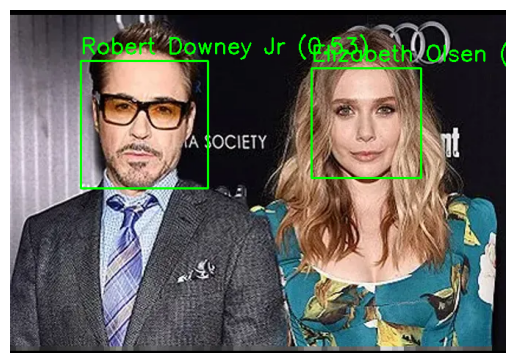

In [31]:
# Mapeamento de labels para nomes dos personagens
label_map = {0: 'Elizabeth Olsen', 1: 'Robert Downey Jr', 2: 'Alexandra Daddario', 3: 'Zac Efron'}

# Testar com uma nova imagem
recognize_faces_in_image('/content/drive/MyDrive/Colab_Notebooks/DIO/Facial/dataset/test/Teste1.jpg', model, label_map)  # Substitua pelo caminho da sua imagem de teste